In [1]:
%matplotlib inline

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

# Linear and logistic regression

## Boston housing

In [12]:
housing_data = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header=None)

In [13]:
housing_data.columns = ["crime_rate", "zoned_land", "industry", "bounds_river", "nox_conc", "rooms", "age", "distance",  "highways", "tax", "pt_ratio", "b_estimator", "pop_status", "price"]

In [15]:
housing_data

,crime_rate,zoned_land,industry,bounds_river,nox_conc,rooms,age,distance,highways,tax,pt_ratio,b_estimator,pop_status,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [16]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
crime_rate,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326717,9.96654
zoned_land,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
industry,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
bounds_river,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
nox_conc,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
rooms,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
age,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
distance,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
highways,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
tax,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


In [17]:
housing_data.dtypes

crime_rate      float64
zoned_land      float64
industry        float64
bounds_river      int64
nox_conc        float64
rooms           float64
age             float64
distance        float64
highways          int64
tax             float64
pt_ratio        float64
b_estimator     float64
pop_status      float64
price           float64
dtype: object

In [18]:
housing_attributes = housing_data.drop(columns="price")

In [19]:
housing_prices = housing_data.price

In [20]:
housing_prices.shape

(506,)

## Preprocess data

In [26]:
housing_attributes_dummies = pd.get_dummies(housing_attributes)
# Scale the data
# 1. Indicator variables, normalization
scaler = MinMaxScaler()
housing_attrs_scaled = scaler.fit_transform(housing_attributes_dummies)

In [27]:
# 2. Running a model
linear_regression = LinearRegression()

In [29]:
linear_regression.fit(housing_attrs_scaled, housing_prices)

LinearRegression()

### Partial influence on the model -> Importance of coef, range is fixed

In [30]:
linear_regression.coef_ #

array([  2.08448854,   1.49403979,   0.34690497,   3.00565375,
        -7.54441381,  22.43940145,   0.27658754,  -9.35981793,
         1.35281035,  -1.26826011,  -9.07603108,   3.74177288,
       -19.03479847])

### If each value of the model is equal to the min value of the data=> (0, 1)

In [31]:
linear_regression.intercept_ # 

23.68929153467698

### Grading the results - fit / predict - random variable, result of an experiment

In [33]:
linear_regression.score(housing_attrs_scaled, housing_prices)

0.7198065414937174

### Heteroskedasticity - STD of the data depends on the input parameters. Different mistake, depending on the area of the data, residuals plot

### Multicollinearity - Input variables are strongly corelated. The information from the columns becomes less. The algorithm has more information than it has to complete the taks -> Dimensionality reduction


### Autocorrelation - Correlation between a variable and its transformation !=0, TimeSeries. 

In [39]:
predictions = linear_regression.predict(housing_attrs_scaled)
np.sqrt(mean_squared_error(housing_prices, predictions))

4.86351800705635

### Regression with Outliers - RANSAC. Model the Inliers data, ignore others

In [48]:
ransac = RANSACRegressor(
    base_estimator = LinearRegression(),
    max_trials = 200,
    min_samples = 0.25, # 1/4 the data
    stop_score = 0.8
)


In [49]:
ransac.fit(housing_attrs_scaled, housing_prices)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\linear_model\_ransac.py:320: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), estimator=LinearRegression(),
                max_trials=200, min_samples=0.25, stop_score=0.8)

In [50]:
ransac.estimator_.coef_

array([  3.78178445,  -0.64483209,   3.86633978,   0.60940141,
       -10.59516531,  22.50681169,   0.82326294,  -5.90771838,
         3.39818376,  -2.41427856,  -8.99672765,   3.60139536,
       -15.96066589])

In [47]:
ransac.inlier_mask_

array([ True,  True, False, False, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [54]:
inliers = housing_data[ransac.inlier_mask_] # Inliers
outliers = housing_data[~ransac.inlier_mask_]

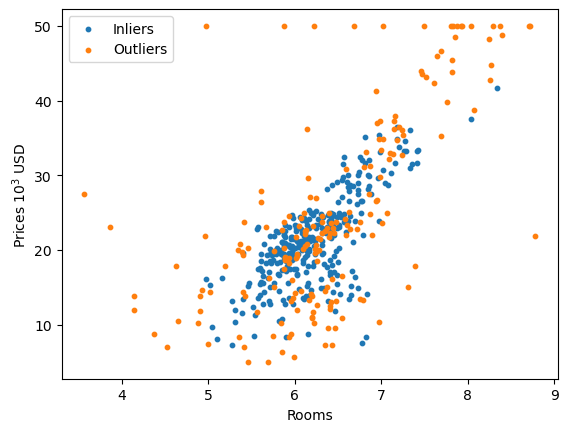

In [64]:
plt.scatter(inliers.rooms, inliers.price, label="Inliers", s=10)
plt.scatter(outliers.rooms, outliers.price, label="Outliers", s=10)
plt.xlabel("Rooms")
plt.ylabel("Prices $10^3$ USD")
plt.legend()
plt.show()

In [65]:
ransac.score(housing_attrs_scaled, housing_prices) # Bias, different variables

0.6926956987834529

In [67]:
ransac.score(housing_attrs_scaled[ransac.inlier_mask_], housing_prices[ransac.inlier_mask_]) # <===

0.9086604468058792

## Polynomial Regression

In [72]:
polynomial_features = PolynomialFeatures(degree=3, interaction_only=True)

In [76]:
housing_attrs_cubed = polynomial_features.fit_transform(housing_attrs_scaled)

In [77]:
polynomial_regression = LinearRegression()
polynomial_regression.fit(housing_attrs_cubed, housing_prices)

LinearRegression()

In [78]:
polynomial_regression.score(housing_attrs_cubed, housing_prices)

0.9672084015746312

#### Curse of dimensionality

## Logistic regression

In [90]:
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [91]:
iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "iris_class"]

In [92]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [93]:
iris_attrs = iris_data.drop(columns=["iris_class"])

In [94]:
iris_types = iris_data.iris_class

In [98]:
scaler = MinMaxScaler()
iris_attrs_scaled = scaler.fit_transform(iris_attrs)

In [101]:
logistic_regression = LogisticRegression(C=1e9)

In [104]:
logistic_regression.fit(iris_attrs_scaled, iris_types)

LogisticRegression(C=1000000000.0)

## Calculated PROBABILITIES of each class - one-vs-rest. 

In [105]:
logistic_regression.coef_  

array([[-18.29679129,  29.19813694, -37.89417388, -38.3219437 ],
       [ 13.58611302,  -6.58018128,  -8.87560643,  -2.78717031],
       [  4.71067827, -22.61795566,  46.76978031,  41.10911401]])

In [106]:
logistic_regression.predict(iris_attrs_scaled)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [107]:
logistic_regression.score(iris_attrs_scaled, iris_types)

0.9866666666666667

In [108]:
logistic_regression.predict_proba(iris_attrs_scaled[:5])

array([[1.00000000e+00, 1.02292805e-10, 1.55808686e-37],
       [9.99999970e-01, 3.00429452e-08, 2.11688322e-33],
       [1.00000000e+00, 1.58498332e-10, 1.87108297e-36],
       [9.99999999e-01, 7.76309552e-10, 1.50865607e-34],
       [1.00000000e+00, 9.50140661e-12, 9.49275281e-39]])

## Creating a pipeline

In [112]:
pipeline = Pipeline([
    ("Scaler", MinMaxScaler()),
    ("Log regression", LogisticRegression(C=10)),    
])

In [113]:
pipeline.fit(iris_attrs, iris_types)

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('Log regression', LogisticRegression(C=10))])

In [114]:
pipeline.steps

[('Scaler', MinMaxScaler()), ('Log regression', LogisticRegression(C=10))]

In [116]:
pipeline.score(iris_attrs, iris_types)

0.96